<a href="https://colab.research.google.com/github/steelpipe75/inhouse-ml-competition/blob/main/competition_files/playground/Colab/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 内輪向け機械学習コンペ サンプル ノートブック

## コンペデータ取得

GitHubからリポジトリをcloneしてデータを持ってくる

In [1]:
REPO_URL = "https://github.com/steelpipe75/inhouse-ml-competition"
REPO_NAME = "inhouse-ml-competition"

In [2]:
!git clone {REPO_URL}

Cloning into 'inhouse-ml-competition'...
remote: Enumerating objects: 542, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 542 (delta 91), reused 128 (delta 46), pack-reused 350 (from 1)
Receiving objects: 100% (542/542), 289.16 KiB | 3.71 MiB/s, done.
Resolving deltas: 100% (303/303), done.


## ライブラリをインポート

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE

## コンペ配布データ読み込み

### 学習用データ読み込み

In [4]:
train_df = pd.read_csv(f"./{REPO_NAME}/competition_files/data/train.csv")

In [5]:
train_df

,id,a,b,c,target
0,1,1,10,100,1
1,2,2,20,200,2
2,3,3,30,300,3
3,4,4,40,400,4
4,5,5,50,500,5
5,6,6,60,600,6
6,7,7,70,700,7
7,8,8,80,800,8
8,9,9,90,900,9
9,10,10,100,1000,10


### 評価用データ読み込み

In [6]:
test_df = pd.read_csv(f"./{REPO_NAME}/competition_files/data/train.csv")

In [7]:
test_df

,id,a,b,c,target
0,1,1,10,100,1
1,2,2,20,200,2
2,3,3,30,300,3
3,4,4,40,400,4
4,5,5,50,500,5
5,6,6,60,600,6
6,7,7,70,700,7
7,8,8,80,800,8
8,9,9,90,900,9
9,10,10,100,1000,10


### サンプル投稿ファイル読み込み

In [8]:
submit = pd.read_csv(f"./{REPO_NAME}/competition_files/data/sample_submission.csv")

In [9]:
submit

,id,target
0,101,1
1,102,1
2,103,1
3,104,1
4,105,1
5,106,1
6,107,1
7,108,1
8,109,1
9,110,1


## 前処理

### 説明変数、目的変数に分割

In [10]:
X = train_df[["a", "b"]]
y = train_df["c"]

In [11]:
X

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70
7,8,80
8,9,90
9,10,100


In [12]:
y

,c
0,100
1,200
2,300
3,400
4,500
5,600
6,700
7,800
8,900
9,1000


In [13]:
X_test = test_df[["a", "b"]]

In [14]:
X_test

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70
7,8,80
8,9,90
9,10,100


### 訓練用データ、検証用データに分割

In [15]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y)

In [16]:
X_train

,a,b
5,6,60
3,4,40
9,10,100
7,8,80
0,1,10
8,9,90
6,7,70


In [17]:
y_train

,c
5,600
3,400
9,1000
7,800
0,100
8,900
6,700


In [18]:
X_eval

,a,b
4,5,50
2,3,30
1,2,20


In [19]:
y_eval

,c
4,500
2,300
1,200


## モデルを訓練

In [20]:
model = LR()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

## 訓練済みモデルによる予測（検証用データ）

In [22]:
y_pred_eval = model.predict(X_eval)

In [23]:
y_pred_eval

array([500., 300., 200.])

予測精度の可視化

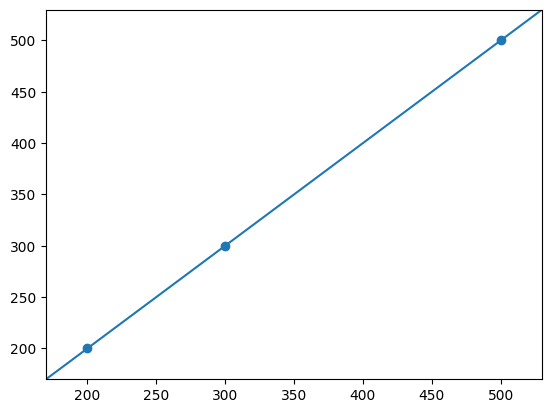

In [24]:
plt.scatter(y_eval, y_pred_eval)

y_eval_min = np.min(y_eval)
y_eval_max = np.max(y_eval)
y_pred_eval_min = np.min(y_pred_eval)
y_pred_eval_max = np.max(y_pred_eval)
y_min = np.minimum(y_eval_min, y_pred_eval_min)
y_max = np.maximum(y_eval_max, y_pred_eval_max)

y_range = y_max - y_min

lim_min = y_min - (y_range * 0.1)
lim_max = y_max + (y_range * 0.1)

plt.xlim([lim_min, lim_max])
plt.ylim([lim_min, lim_max])

plt.plot([lim_min, lim_max], [lim_min, lim_max])

plt.show()

In [25]:
mse_eval = MSE(y_eval, y_pred_eval)
rmse_eval = np.sqrt(mse_eval)

In [26]:
f"{rmse_eval=}"

'rmse_eval=np.float64(6.765720123802386e-14)'

## 訓練済みモデルによる予測（評価用データ）

In [27]:
y_pred_test = model.predict(X_test)

In [28]:
y_pred_test

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

## 採点用投稿ファイル作成

In [29]:
submit["target"] = y_pred_test

In [30]:
submit

,id,target
0,101,100.0
1,102,200.0
2,103,300.0
3,104,400.0
4,105,500.0
5,106,600.0
6,107,700.0
7,108,800.0
8,109,900.0
9,110,1000.0


In [31]:
submit.to_csv("submit.csv", index=False)